In [2]:
import os

import warnings 
warnings.filterwarnings('ignore')


# for data analytics
import pandas as pd
import numpy as np
from collections import Counter

# for visualizations
#import seaborn as sns
import matplotlib.pyplot as plt

# for data preparation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# imblean provides tools for us to deal with imbalanced class sizes
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN

# # For entropy computation
# from pyitlib import discrete_random_variable as drv

from scipy import stats
import missingno
from sklearn import preprocessing

# TEXT EDA
# from wordcloud import WordCloud

# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS
# from spacy.lang.en import English

#import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 100
#import matplotlib.gridspec as gridspec
#import seaborn as sns; sns.set()
import ast

from datetime import date, time, datetime
import calendar

import pandas as pd
import emoji
import regex as re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from deep_translator import GoogleTranslator


import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/sabrina/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sabrina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('../cleaning/cleaned_restaurant_reviews.csv', index_col=0)

## General counts

In [4]:
# Total Number of restaurant reviews
print(f'No. reviews: {len(data)}')
# Number of restaurants with reviews
num = len(data['url'].unique())
print(f'No. restaurants: {num}')

No. reviews: 28075
No. restaurants: 845


## Prepare for EDA

In [5]:
cleaned_data = data.drop(['cleaned_text'], axis =1)

In [6]:
cleaned_data.head(5)

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Convenient,Halal,Breakfast & Brunch,Fast Food,European,Fine Dining,Drinks,Korean,Value,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,1,East
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,1,East
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,1,East
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,1,East
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,1,East


## Categorical EDA

Pie Chart of restaurants/reviews by neighbourhood - if got too many cats we do bar chart DONE
Bar chart by restaurants/reviews by category (might not sum to 100 bc 1 restaurant can be in multiple categories) DONE
Histogram of number of reviews for each restaurant -> 10-20 reviews (10 rest), 20-30 reviews (20 rest) DONE
Box and whiskers plot for price data DONE
Normal distribution chart for price data 
Number of reviews per date

#### Bar Chart of Restaurants by Neighbourhood

In [7]:
num_rest_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_North = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')
num_rest_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

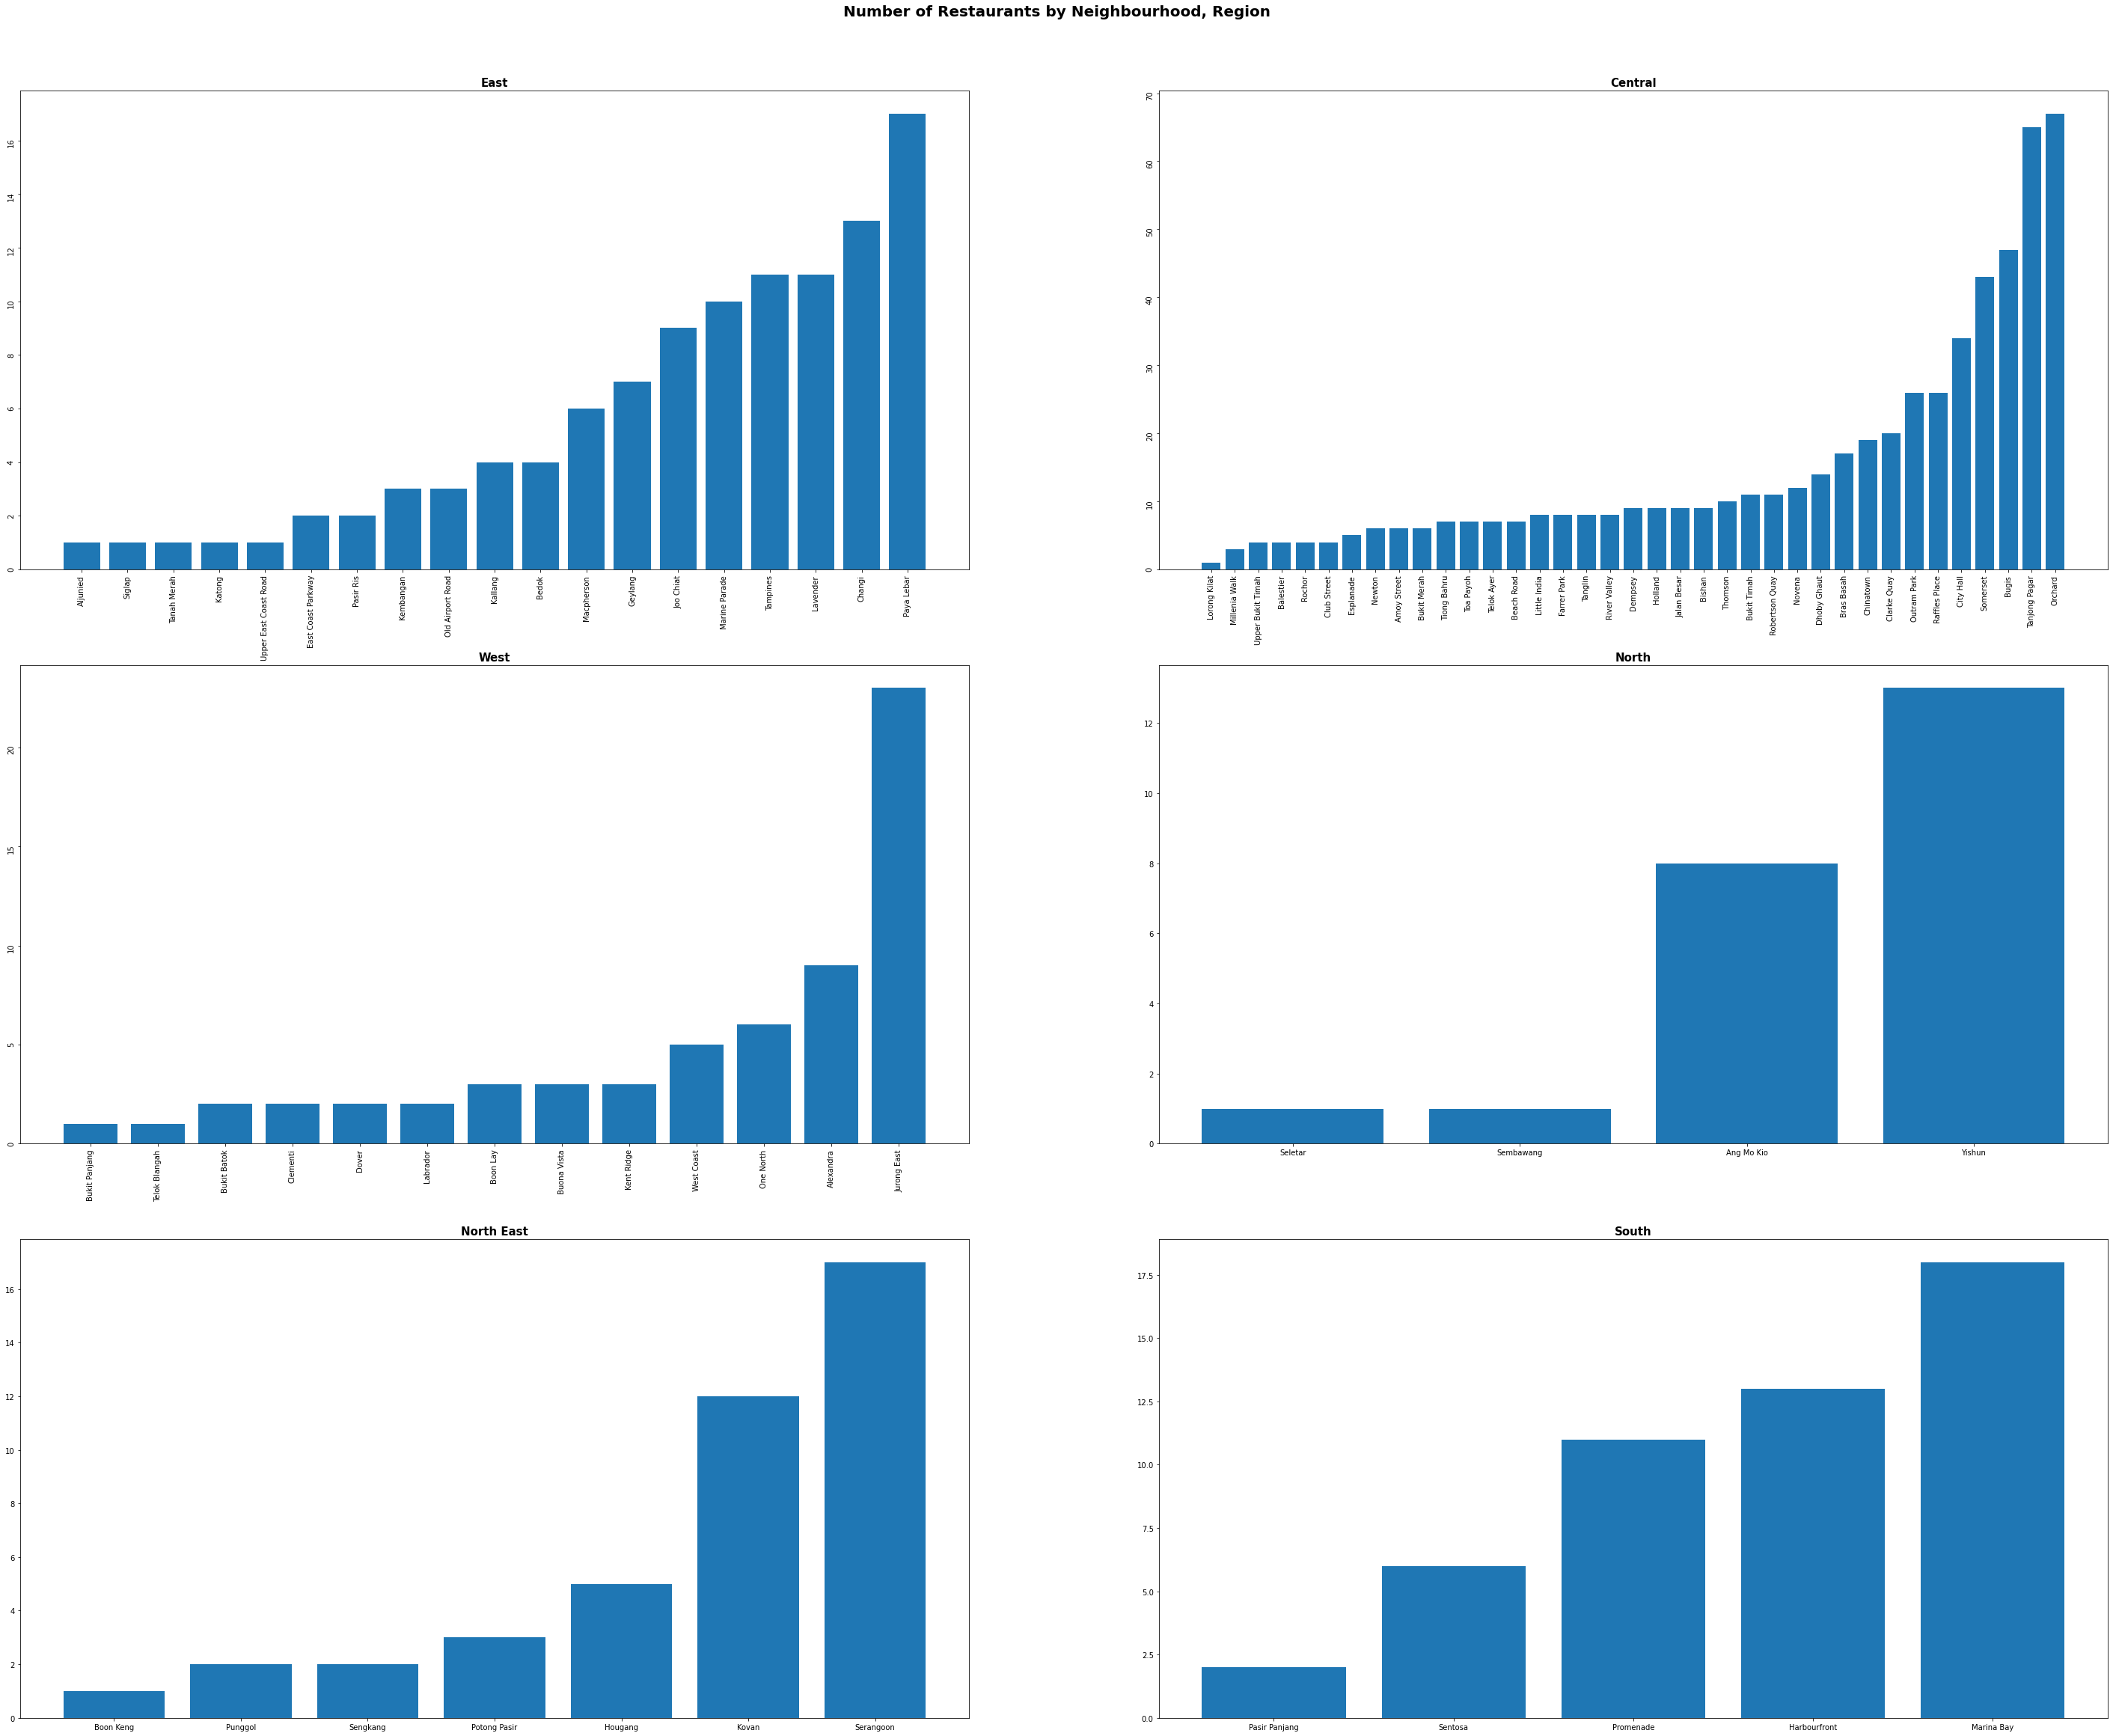

In [8]:

fig, axs = plt.subplots(3,2, figsize=(50, 40))
axs[0][0].bar(num_rest_by_neighbourhood_East['neighbourhood'], num_rest_by_neighbourhood_East['url'])
axs[0][1].bar(num_rest_by_neighbourhood_Central['neighbourhood'], num_rest_by_neighbourhood_Central['url'])
axs[1][0].bar(num_rest_by_neighbourhood_West['neighbourhood'], num_rest_by_neighbourhood_West['url'])
axs[1][1].bar(num_rest_by_neighbourhood_North['neighbourhood'], num_rest_by_neighbourhood_North['url'])
axs[2][0].bar(num_rest_by_neighbourhood_NE['neighbourhood'], num_rest_by_neighbourhood_NE['url'])
axs[2][1].bar(num_rest_by_neighbourhood_South['neighbourhood'], num_rest_by_neighbourhood_South['url'])

fig.suptitle('Number of Restaurants by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Restaurants by Region

In [9]:
num_rest_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].nunique()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Restaurants by Region')

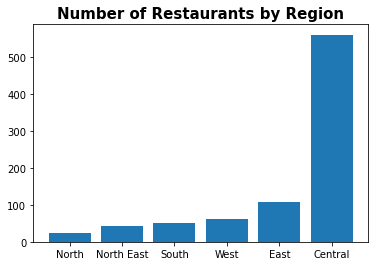

In [10]:
plt.bar(num_rest_by_region['region'],num_rest_by_region['url'])
plt.title('Number of Restaurants by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Reviews by Neighbourhood

In [11]:
num_reviews_by_neighbourhood_East = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_Central = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'Central'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_West = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'West'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_North= pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_NE = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'North East'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')
num_reviews_by_neighbourhood_South = pd.DataFrame(cleaned_data[cleaned_data['region'] == 'South'].groupby('neighbourhood')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'South')

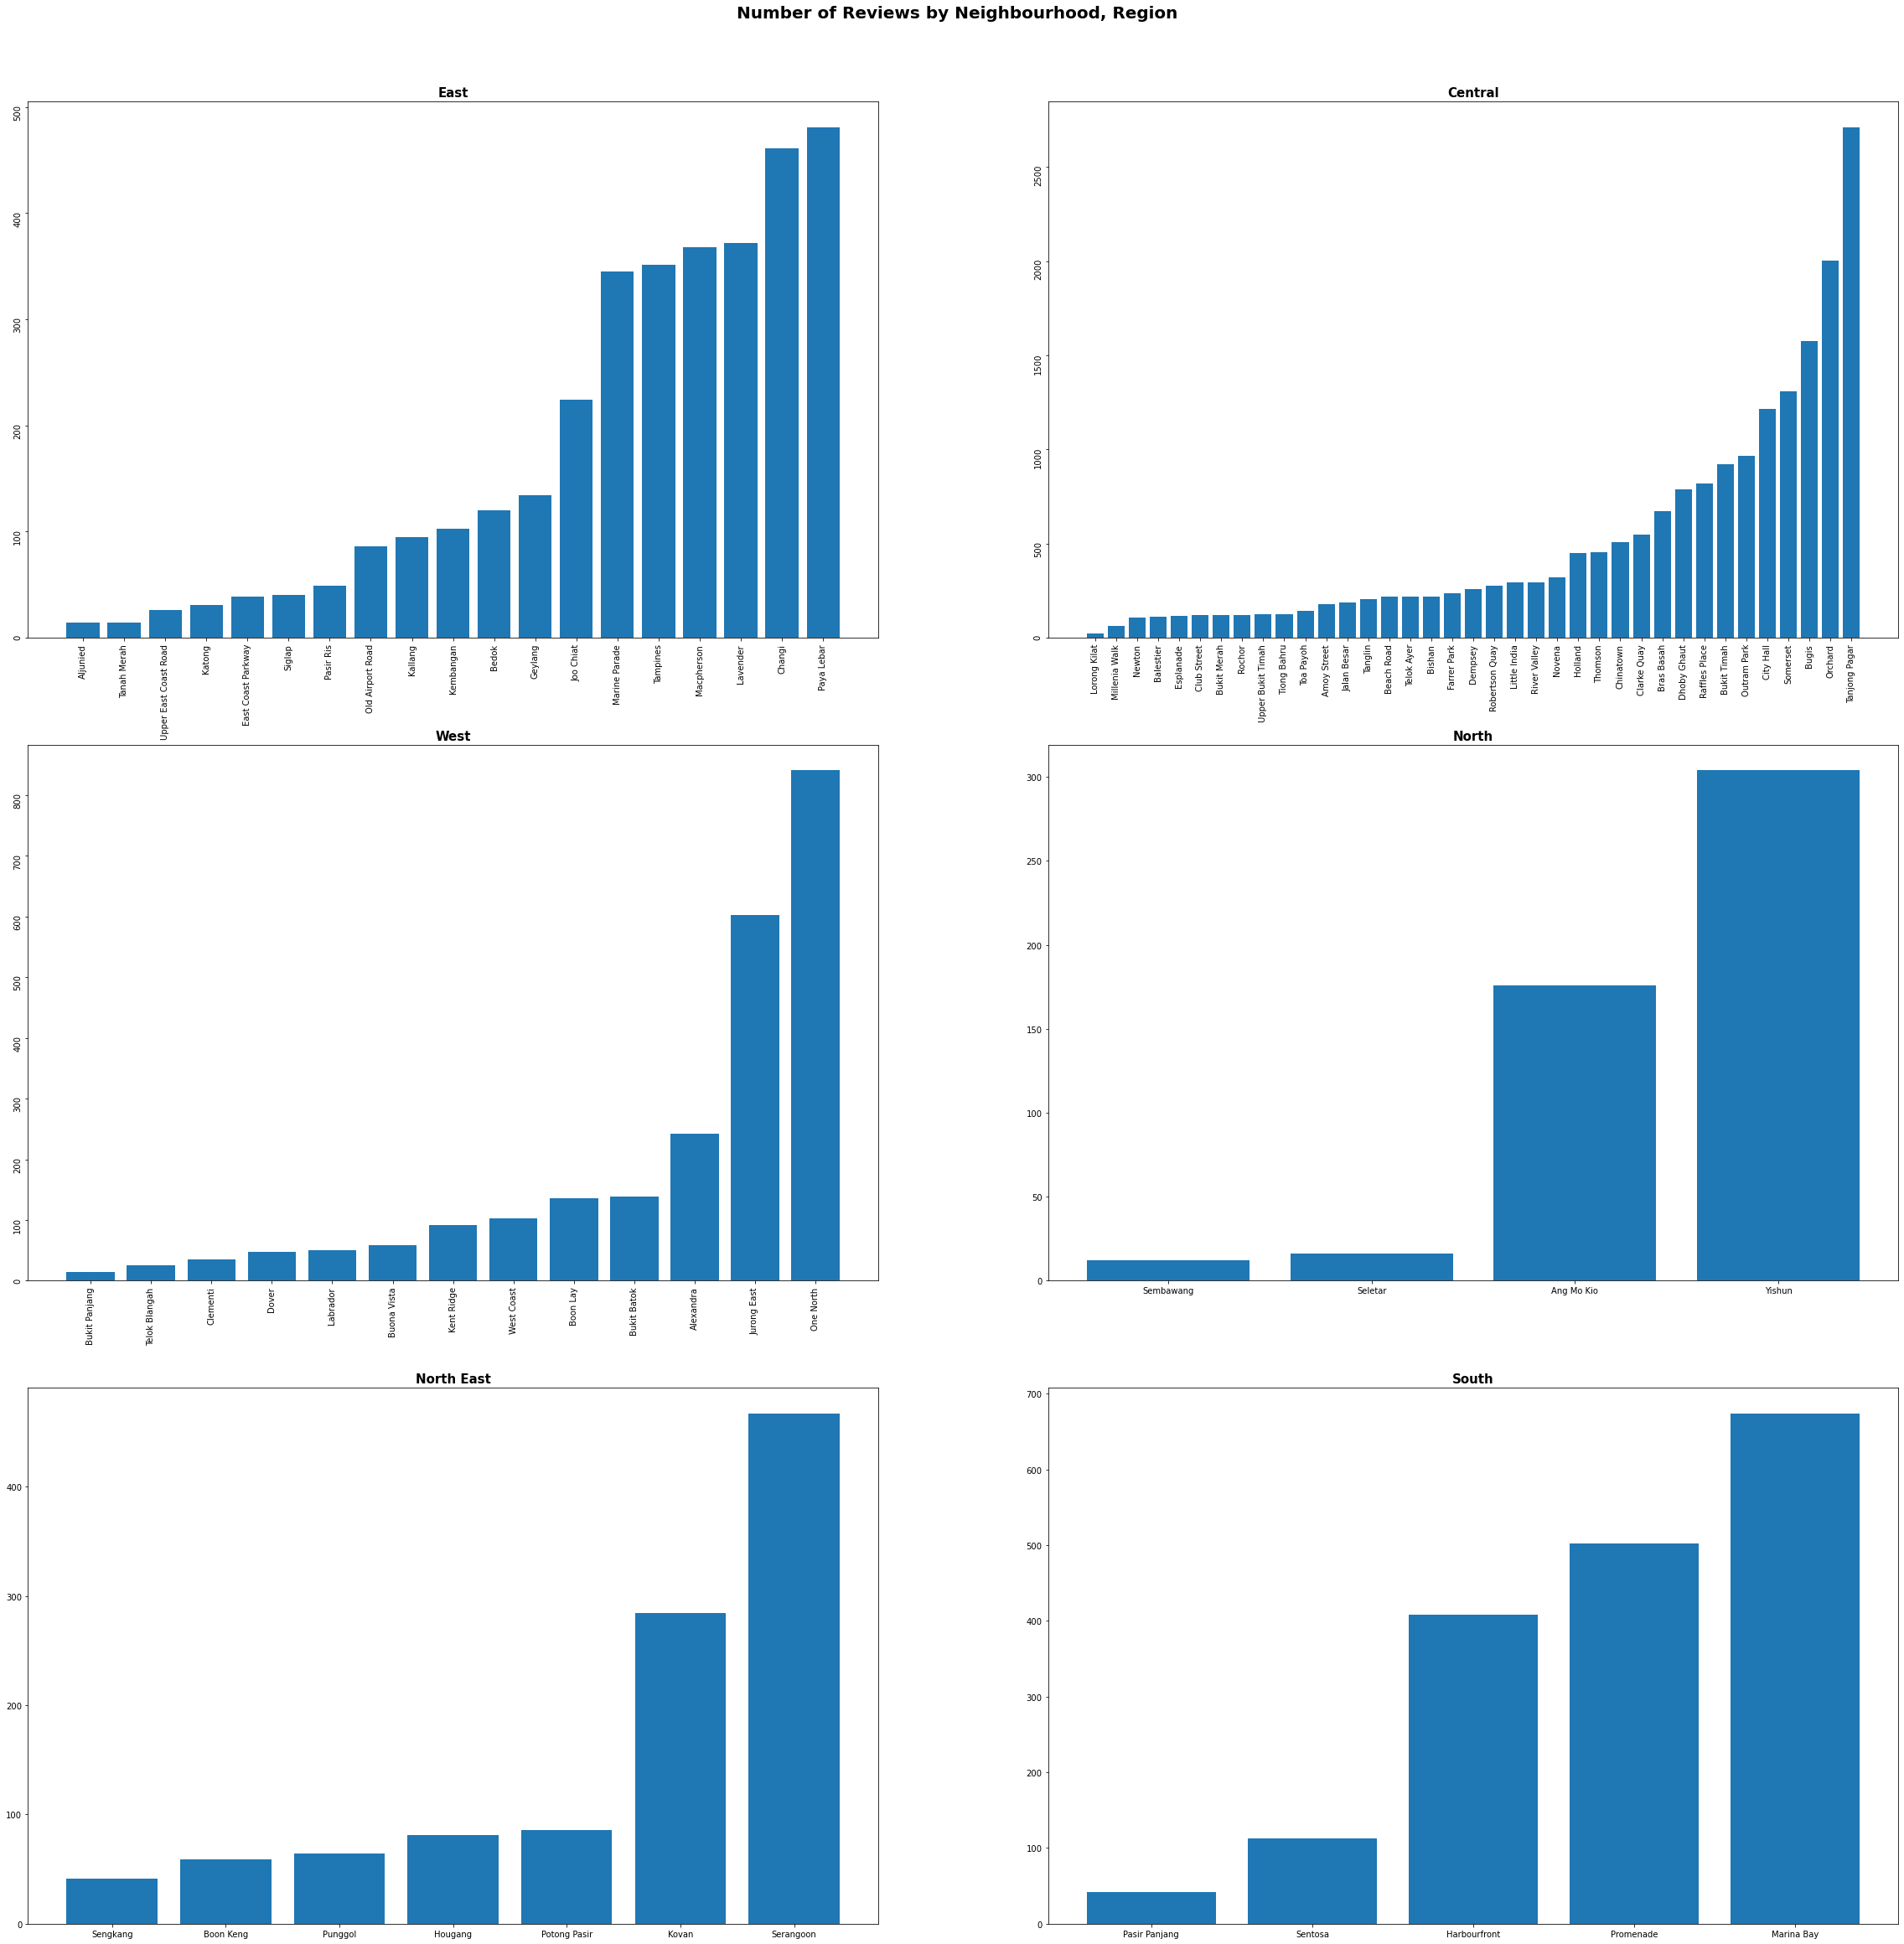

In [12]:
fig, axs = plt.subplots(3,2, figsize=(40, 40))
axs[0][0].bar(num_reviews_by_neighbourhood_East['neighbourhood'], num_reviews_by_neighbourhood_East['url'])
axs[0][1].bar(num_reviews_by_neighbourhood_Central['neighbourhood'], num_reviews_by_neighbourhood_Central['url'])
axs[1][0].bar(num_reviews_by_neighbourhood_West['neighbourhood'], num_reviews_by_neighbourhood_West['url'])
axs[1][1].bar(num_reviews_by_neighbourhood_North['neighbourhood'], num_reviews_by_neighbourhood_North['url'])
axs[2][0].bar(num_reviews_by_neighbourhood_NE['neighbourhood'], num_reviews_by_neighbourhood_NE['url'])
axs[2][1].bar(num_reviews_by_neighbourhood_South['neighbourhood'], num_reviews_by_neighbourhood_South['url'])

fig.suptitle('Number of Reviews by Neighbourhood, Region', fontsize=20, fontweight='extra bold', y=0.92, x=0.51)
axs[0][0].set_title('East', fontsize=15, fontweight='bold')
axs[0][0].tick_params(labelrotation = 90)

axs[0][1].set_title('Central', fontsize=15, fontweight='bold')
axs[0][1].tick_params(labelrotation = 90)

axs[1][0].set_title('West', fontsize=15, fontweight='bold')
axs[1][0].tick_params(labelrotation = 90)

axs[1][1].set_title('North', fontsize=15, fontweight='bold')
axs[2][0].set_title('North East', fontsize=15, fontweight='bold')
axs[2][1].set_title('South', fontsize=15, fontweight='bold')


#### Bar Chart of Reviews by Region

In [13]:
num_reviews_by_region = pd.DataFrame(cleaned_data.groupby('region')['url'].count()).reset_index().sort_values('url')

Text(0.5, 1.0, 'Number of Reviews by Region')

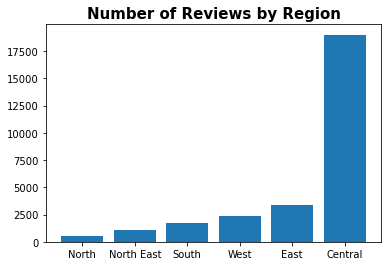

In [14]:
plt.bar(num_reviews_by_region['region'],num_reviews_by_region['url'])
plt.title('Number of Reviews by Region', fontsize=15, fontweight='bold')

#### Bar Chart of Restaurants by Category

In [15]:
rest_cat_df = cleaned_data.iloc[:, cleaned_data.columns.get_loc('cleaned_categories')+1:-1]
rest_cat_df['url'] = cleaned_data['url']


In [16]:
rest_cat_counts = rest_cat_df.drop_duplicates(['url'])
rest_cat_counts = pd.DataFrame(rest_cat_counts.sum()).reset_index().iloc[:-1,:].sort_values(0)

In [17]:
rest_cat_counts

,index,0
4,Good Environment,10
5,BBQ,13
2,Novel,14
17,Indian,15
19,Bites,20
26,Fast Food,20
7,Rainy Day Comforts,21
14,Healthy,22
1,Buffets,23
28,Fine Dining,24


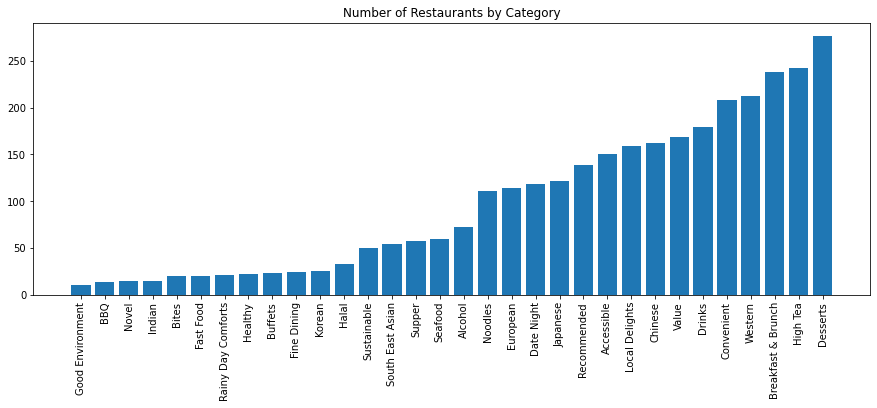

In [18]:
plt.figure(figsize=(15,5))
plt.bar(rest_cat_counts['index'], rest_cat_counts[0])
plt.xticks(rotation = 90)
plt.title('Number of Restaurants by Category')
plt.show()

#### Bar Chart of Reviews by Category

In [19]:
reviews_cat_df = pd.DataFrame(rest_cat_df.sum()).reset_index().iloc[:-1,:].sort_values(0)

In [20]:
reviews_cat_df

,index,0
17,Indian,276
4,Good Environment,341
5,BBQ,359
7,Rainy Day Comforts,443
28,Fine Dining,528
2,Novel,533
1,Buffets,577
26,Fast Food,720
24,Halal,879
30,Korean,881


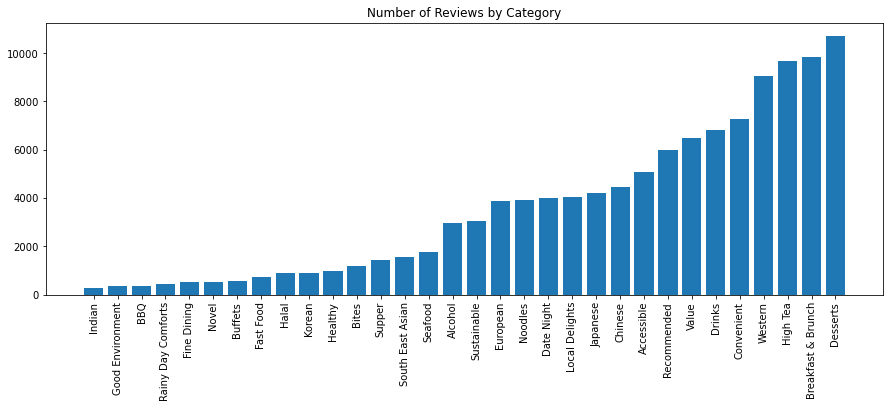

In [21]:
plt.figure(figsize=(15,5))
plt.bar(reviews_cat_df['index'], reviews_cat_df[0])
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Category')
plt.show()

#### Histogram of Number of reviews by Restaurant

In [22]:
num_reviews_by_rest = pd.DataFrame(cleaned_data.groupby('url')['name'].count()).reset_index()

In [23]:
num_reviews_by_rest.describe()

,name
count,845.000000
mean,33.224852
std,32.376658
min,10.000000
25%,16.000000
50%,24.000000
75%,38.000000
max,357.000000


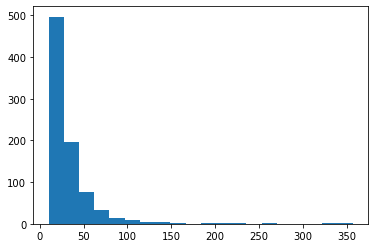

In [24]:
plt.hist(num_reviews_by_rest['name'], bins = 20)
plt.show()

#### Box & Whiskers For Price By Category

In [25]:
box_df = cleaned_data.drop_duplicates('url')

In [26]:
# find unique categories

def find_unique_categories(category_col_name, data):
    all_categories = []
    for categories in data[category_col_name]:
        try:
            all_categories.extend(ast.literal_eval(categories))
        except:
            all_categories.extend(categories)
    print(f'Num of Categories:{len(set(all_categories))}')
    for i in set(all_categories):
        print(i)
    return list(set(all_categories))
    

list_cleaned_categories = find_unique_categories('cleaned_categories', cleaned_data)

Num of Categories:32
Recommended
Noodles
Local Delights
European
Sustainable
Indian
Bites
South East Asian
Buffets
Rainy Day Comforts
High Tea
Supper
Chinese
Fast Food
Desserts
Value
Drinks
Japanese
Healthy
Good Environment
Novel
Date Night
Seafood
Fine Dining
Convenient
Accessible
Western
Breakfast & Brunch
Korean
Alcohol
BBQ
Halal


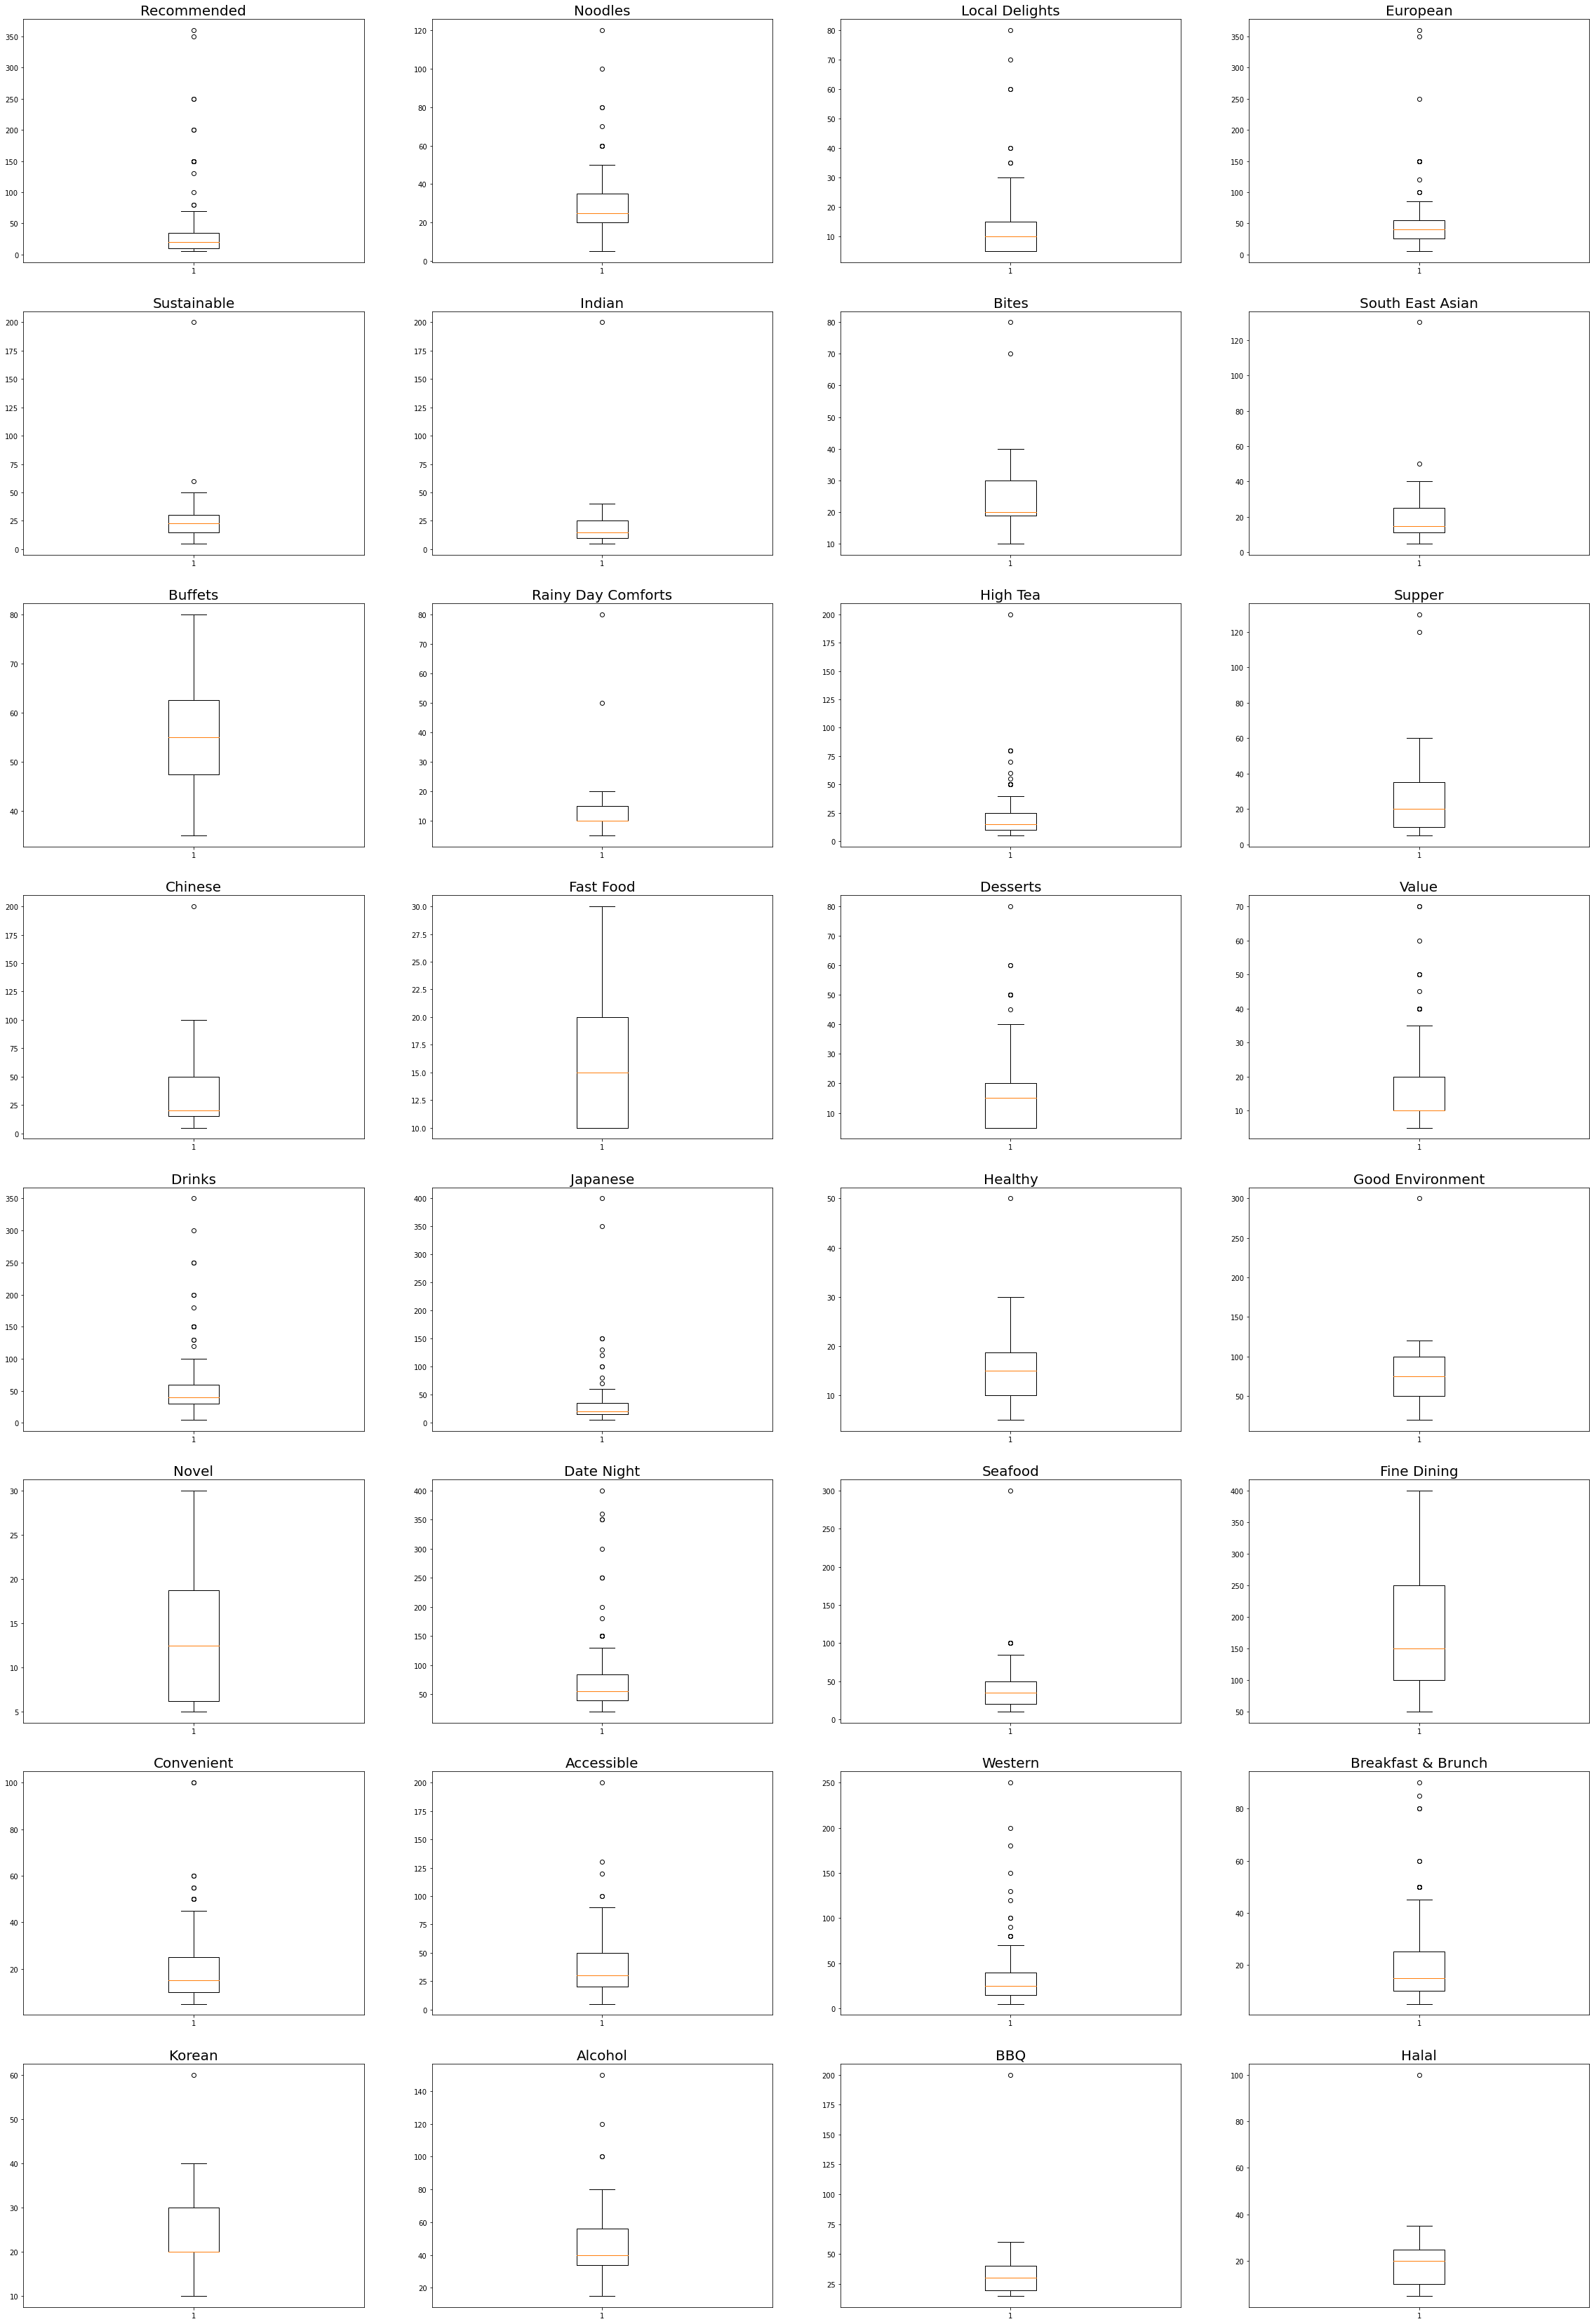

In [27]:
fig, axs = plt.subplots(8,4, figsize=(40, 60))

for index, name in enumerate(list_cleaned_categories):
    cat_df = box_df[box_df[name] == 1]
    axs[index//4,index%4].boxplot(cat_df['cleaned_price'])
    axs[index//4,index%4].set_title(name, fontsize=20)
    


# for i in range(0,4):
#     for j in range(0,13):
#         for category in list_cleaned_categories:
#             cat_df = box_df[box_df[category] == 1]
#             axs[i][j].boxplot(cat_df['cleaned_price'])
            


#### Box & Whiskers for Price By Region

In [28]:
box_df

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Convenient,Halal,Breakfast & Brunch,Fast Food,European,Fine Dining,Drinks,Korean,Value,region
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,0,1,East
0,https://www.burpple.com/99-thai-story?bp_ref=%...,99 Thai Story,Bishan,~$15/pax,['Thai'],\nSteamed Fish with Lemon Garlic Sauce\nGotten...,Khaw Han Chung,"Jan 6, 2022",15.0,['South East Asian'],...,0,0,0,0,0,0,0,0,0,Central
0,https://www.burpple.com/aburi-en-jem?bp_ref=%2...,Aburi-EN (Jem),Jurong East,~$25/pax,"['Delivery', 'Japanese']",\nAburi 9 Kinds Kaisen Chirashi Don | $35++\nF...,Iced Americano,5d ago,25.0,"['Convenient', 'Japanese']",...,1,0,0,0,0,0,0,0,0,West
0,https://www.burpple.com/ah-loy-thai?bp_ref=%2F...,Ah Loy Thai,Bugis,~$10/pax,"['Thai', 'Cheap & Good', 'Good For Groups']",\nTom yam fried rice\nThe tom yam fried rice w...,Ethel Tan,16m ago,10.0,"['South East Asian', 'Value', 'Accessible']",...,0,0,0,0,0,0,0,0,1,Central
0,https://www.burpple.com/ajummas?bp_ref=%2Ff%2F...,Ajumma's (Funan),City Hall,~$15/pax,"['Korean', 'Delivery']",\nCrispy Samgyeopsal With Creamy Scrambled Egg...,The Hungry Fatty,3h ago,15.0,"['Korean', 'Convenient']",...,1,0,0,0,0,0,0,1,0,Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,https://www.burpple.com/9-plus-cafe?bp_ref=%2F...,9 Plus Cafe,Aljunied,~$5/pax,['Hawker Food'],\nBa Chor Mee\nFrom the stall that primarily s...,Thiam Peng Tan,Jul 6 at 12:43am,5.0,['Local Delights'],...,0,0,0,0,0,0,0,0,0,East
0,https://www.burpple.com/49-seats-4?bp_ref=%2Ff...,49 Seats (The Centrepoint),Somerset,~$20/pax,"['Western', 'Pasta']",\nSprite & Coke Float \n\nSprite float & Coke ...,Zoey Belle,9m ago,20.0,"['Western', 'Western', 'Noodles']",...,0,0,0,0,0,0,0,0,0,Central
0,https://www.burpple.com/alexandra-village-food...,Alexandra Village Food Centre,Alexandra,~$10/pax,"['Hawker Food', 'Cheap & Good']",\nGood oyster omelette \nOyster omelette @ $7\...,Gerard Lim,4m ago,10.0,"['Local Delights', 'Value']",...,0,0,0,0,0,0,0,0,1,West
0,https://www.burpple.com/abc-brickworks-market-...,ABC Brickworks Market & Food Centre,Bukit Merah,~$10/pax,"['Burpple Guides', 'Hawker Food', 'Cheap & Good']",\nJuicy chicken wings and get the chicken sata...,Jason Ng,14m ago,10.0,"['Recommended', 'Local Delights', 'Value']",...,0,0,0,0,0,0,0,0,1,Central


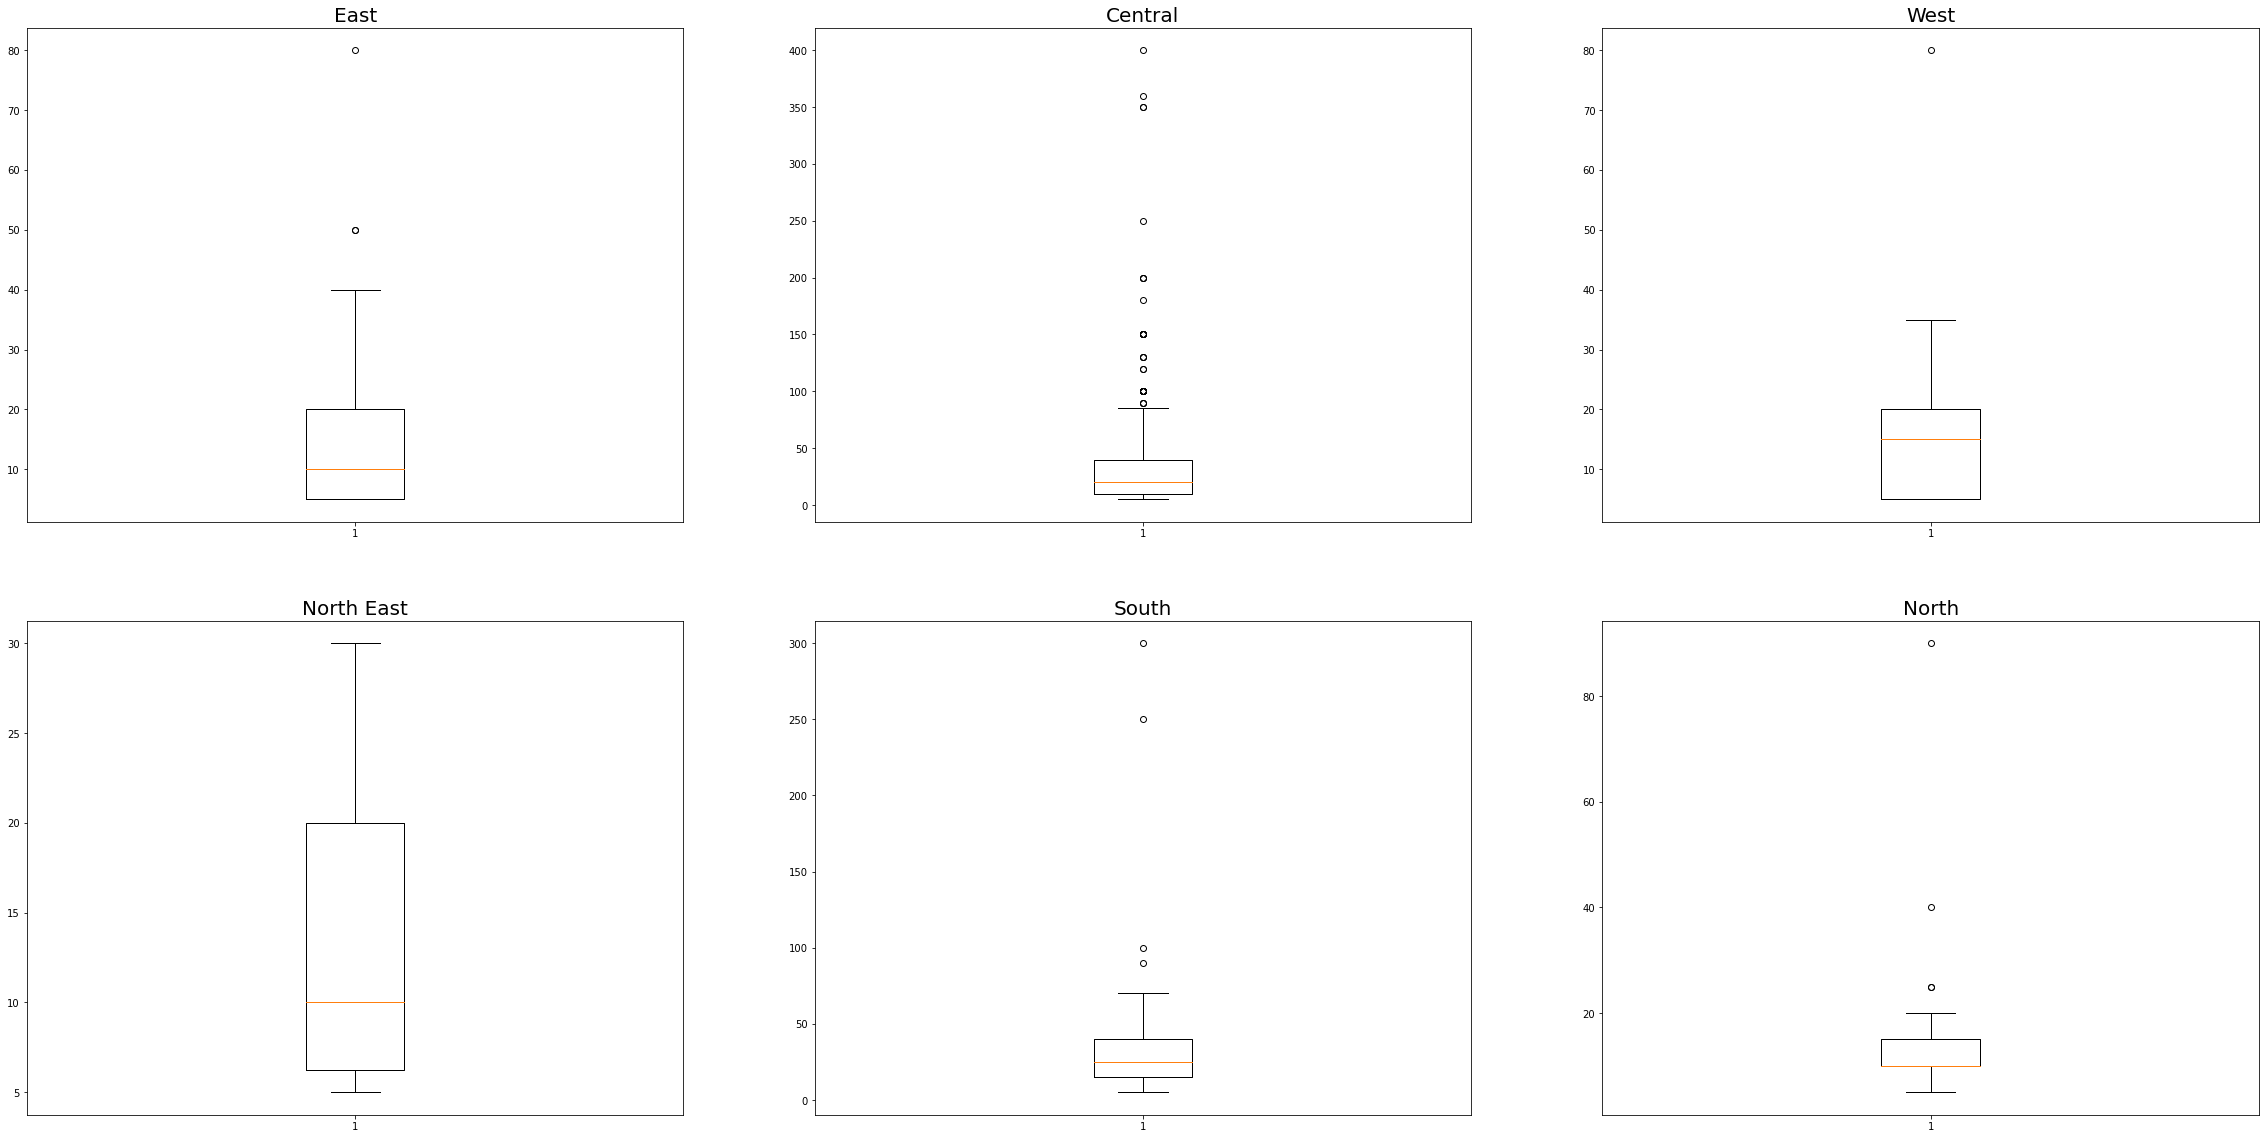

In [29]:
fig, axs = plt.subplots(2,3, figsize=(40, 20))

for index, name in enumerate(box_df['region'].unique()):
    cat_df = box_df[box_df['region'] == name]
    axs[index//3,index%3].boxplot(cat_df['cleaned_price'])
    axs[index//3,index%3].set_title(name, fontsize=20)


#### Histogram for Price

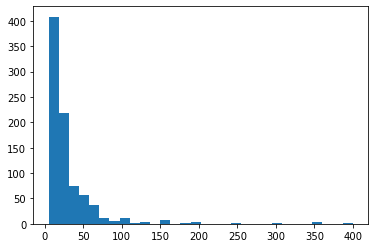

In [30]:
plt.hist(box_df['cleaned_price'], bins = 30) ## find the x limit thing
plt.show()

#### Number of Reviews by Date

In [31]:
cal_dict = dict((month, index) for index, month in enumerate(calendar.month_abbr) if month)

In [32]:
cleaned_dates = []
for idx, row in cleaned_data.iterrows():
    dt = row['date'].strip()
    if 'ago' in dt:
        if 'm' in dt or 'h' in dt or 's' in dt:
            cleaned_dates.append(date(2023, 3, 15))
        elif 'week' in dt:
            cleaned_dates.append(date(2023, 3, 8))
        else:
            dt_new = int(dt.replace('d ago', ''))
            dt_new = 15- dt_new
            cleaned_dates.append(date(2023, 3, dt_new))
            
    elif 'at' in dt:
        mth_day = dt.split(' ')
        new_date = date(2023, cal_dict[mth_day[0]], int(mth_day[1]))
        if new_date > date(2023,3,15):
            cleaned_dates.append(date(2022,cal_dict[mth_day[0]], int(mth_day[1])))
        else:
            cleaned_dates.append(date(2023, cal_dict[mth_day[0]], int(mth_day[1])))
    
    else:
        mth_day = dt.split(',')[0].split(' ')
        cleaned_dates.append(date(int(dt.split(',')[-1]), cal_dict[mth_day[0]], int(mth_day[1])))

In [33]:
cleaned_data['cleaned_dates'] = cleaned_dates

In [34]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Halal,Breakfast & Brunch,Fast Food,European,Fine Dining,Drinks,Korean,Value,region,cleaned_dates
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,1,East,2023-03-15
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,1,East,2022-07-30
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,1,East,2022-07-30
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,1,East,2022-07-30
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,0,1,East,2022-07-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,0,Central,2020-10-27
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,0,Central,2020-10-26
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,0,Central,2020-10-09
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,0,Central,2020-10-01


In [35]:
from dateutil.parser import parse
dt = parse('Mon Feb 15 2010')
cleaned_data['mmyyyy'] = cleaned_data['cleaned_dates'].apply(lambda x: date(x.year, x.month, 1))

In [36]:
cleaned_data

,url,name,neighbourhood,price,categories,review,user,date,cleaned_price,cleaned_categories,...,Breakfast & Brunch,Fast Food,European,Fine Dining,Drinks,Korean,Value,region,cleaned_dates,mmyyyy
0,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nFish Ball Minced Meat Noodle\nFishball, meat...",Triffany Lim,21m ago,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,East,2023-03-15,2023-03-01
1,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']","\nOrh lua\nThere are a couple of stores, but g...",Ally Tan,Jul 30 at 4:12pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,East,2022-07-30,2022-07-01
2,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nPeanut sauce was ace\nI love a good satay pe...,Ally Tan,Jul 30 at 4:10pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,East,2022-07-30,2022-07-01
3,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nClassic BBQ wings\nJuicy and tasty like it’s...,Ally Tan,Jul 30 at 4:09pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,East,2022-07-30,2022-07-01
4,https://www.burpple.com/bedok-85-market?bp_ref...,85 Fengshan Centre,Bedok,~$5/pax,"['Hawker Food', 'Supper', 'Cheap & Good']",\nBBQ stingray\nIt was yummy but slight warnin...,Ally Tan,Jul 30 at 4:08pm,5.0,"['Local Delights', 'Supper', 'Value']",...,0,0,0,0,0,0,1,East,2022-07-30,2022-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box D $13.80\n川椒雞柳 | 鮮腐竹蝦球 | 清炒西蘭花 | ...,K T,"Oct 27, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,Central,2020-10-27,2020-10-01
15,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box C $11.80\n普寧豆醬走地雞 | 鮮菌翡翠豆腐 | 蒜茸炒四...,K T,"Oct 26, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,Central,2020-10-26,2020-10-01
16,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\nBento Box B $11.80\n蒜子豆豉凉瓜黑豬梅肉 | 香菌扒豆腐 | 蒜茸...,K T,"Oct 9, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,Central,2020-10-09,2020-10-01
17,https://www.burpple.com/chui-huay-lim-teochew-...,Chui Huay Lim Teochew Cuisine,Newton,~$50/pax,"['Chinese', 'Good For Groups']",\n潮州糜 Bento A $12.80\n鹵鴨拼豆干 | 川椒雞 | 欖菜四季苗| 菜脯...,K T,"Oct 1, 2020",50.0,"['Chinese', 'Accessible']",...,0,0,0,0,0,0,0,Central,2020-10-01,2020-10-01


In [37]:
df_by_month = cleaned_data.groupby('mmyyyy')['url'].count().reset_index().iloc[:-1, :]
df_by_month

,mmyyyy,url
0,2020-01-01,942
1,2020-02-01,937
2,2020-03-01,1156
3,2020-04-01,497
4,2020-05-01,390
5,2020-06-01,522
6,2020-07-01,835
7,2020-08-01,1143
8,2020-09-01,1097
9,2020-10-01,1211


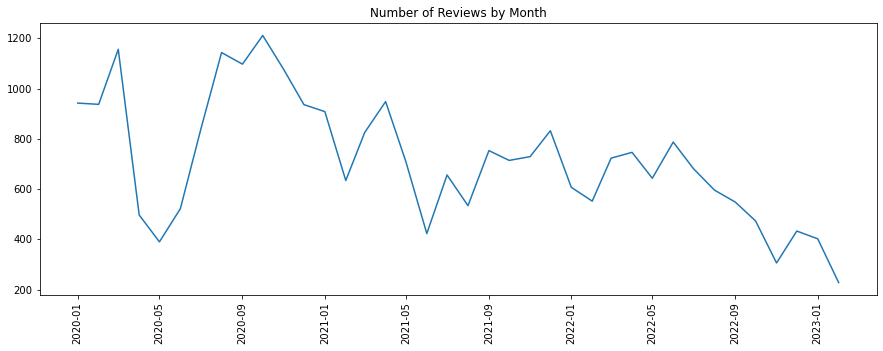

In [38]:
plt.figure(figsize=(15,5))
plt.plot(df_by_month['mmyyyy'],df_by_month['url'] )
plt.xticks(rotation = 90)
plt.title('Number of Reviews by Month')
plt.show()


In [39]:
df_by_date = cleaned_data.groupby('cleaned_dates')['url'].count().reset_index().iloc[:-15,:]
df_by_date

,cleaned_dates,url
0,2020-01-01,41
1,2020-01-02,37
2,2020-01-03,38
3,2020-01-04,28
4,2020-01-05,56
...,...,...
1149,2023-02-24,8
1150,2023-02-25,9
1151,2023-02-26,22
1152,2023-02-27,2


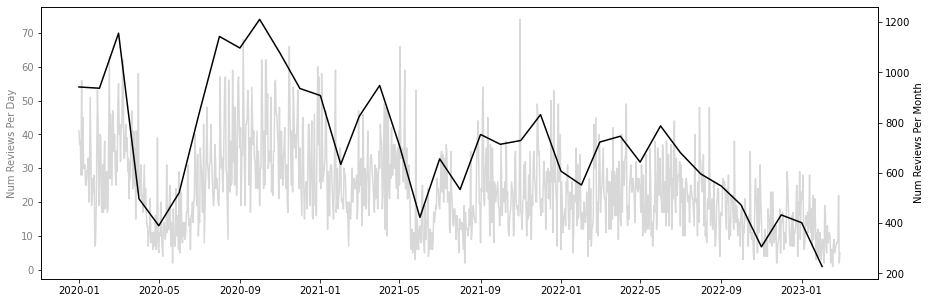

In [40]:
fig, ax1 = plt.subplots(figsize=(15,5))
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

ax1.plot(df_by_date['cleaned_dates'],df_by_date['url'],  color = 'grey', alpha = 0.3)
ax1.set_ylabel('Num Reviews Per Day', color = 'grey')
ax1.tick_params(axis = 'y', labelcolor = 'grey')
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(df_by_month['mmyyyy'],df_by_month['url'], color = 'black')
ax2.set_ylabel('Num Reviews Per Month')
ax2.grid(False)

# plt.xticks(rotation = 90)
# plt.title('Number of Reviews by Date')
# plt.show()